# Import libraries and dependencies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as mnso
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import boxcox
from scipy.special import boxcox1p

# Load the data

In [2]:
X_train = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
X_test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e12/sample_submission.csv')

X_train = X_train.drop(['id'], axis=1)

id_test = X_test.id
X_test = X_test.drop('id', axis=1)

pd.set_option('display.max_columns', None)

In [3]:
X_train

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [4]:
X_test

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


# Feature enginereering

## Log transformation of annual income

In [5]:
X_train['Annual Income'] = np.log1p(X_train['Annual Income'])
X_test['Annual Income'] = np.log1p(X_test['Annual Income'])

## Time features

In [6]:
X_train

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,9.215328,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,10.363409,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,10.150465,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,11.862568,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,10.587897,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,10.215264,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,54.0,Male,10.485340,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,19.0,Male,10.856785,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [7]:
def create_policy_start_date_separated_features(df):
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')
    df['Policy_Start_Year'] = df['Policy Start Date'].dt.year
    df['Policy_Start_Month'] = df['Policy Start Date'].dt.month
    df['Policy_Start_Day'] = df['Policy Start Date'].dt.day
    
    return df

In [8]:
import numpy as np
import pandas as pd

def circular_features_time(df, date_column='Policy Start Date'):
    df[date_column] = pd.to_datetime(df[date_column])
    
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['year_day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['year_day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
    
    df['month'] = df[date_column].dt.month
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    df["seconds_since_1970"] = df[date_column].astype("int64") // 10**9
    df = df.drop('Policy Start Date', axis=1)

    return df

In [9]:
train = create_policy_start_date_separated_features(X_train)
test = create_policy_start_date_separated_features(X_test)

train = circular_features_time(X_train)
test = circular_features_time(X_test)

In [10]:
train

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Start_Year,Policy_Start_Month,Policy_Start_Day,day_of_week,day_sin,day_cos,day_of_year,year_day_sin,year_day_cos,month,month_sin,month_cos,seconds_since_1970
0,19.0,Female,9.215328,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,2023,12,23,5,-0.974928,-0.222521,357,-0.137279,0.990532,12,-2.449294e-16,1.000000e+00,1703344899
1,39.0,Female,10.363409,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023,6,12,0,0.000000,1.000000,163,0.329408,-0.944188,6,1.224647e-16,-1.000000e+00,1686583299
2,23.0,Male,10.150465,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0,2023,9,30,5,-0.974928,-0.222521,273,-0.999917,-0.012910,9,-1.000000e+00,-1.836970e-16,1696087299
3,21.0,Male,11.862568,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024,6,12,2,0.974928,-0.222521,164,0.313107,-0.949718,6,1.224647e-16,-1.000000e+00,1718205699
4,21.0,Male,10.587897,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021,12,1,2,0.974928,-0.222521,335,-0.493776,0.869589,12,-2.449294e-16,1.000000e+00,1638372099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,10.215264,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,Poor,No,Daily,Apartment,1303.0,2023,5,3,2,0.974928,-0.222521,123,0.854322,-0.519744,5,5.000000e-01,-8.660254e-01,1683127299
1199996,54.0,Male,10.485340,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,Poor,No,Weekly,Apartment,821.0,2022,9,10,5,-0.974928,-0.222521,253,-0.936881,-0.349647,9,-1.000000e+00,-1.836970e-16,1662823299
1199997,19.0,Male,10.856785,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,Good,No,Monthly,Condo,371.0,2021,5,25,1,0.781831,0.623490,145,0.601624,-0.798779,5,5.000000e-01,-8.660254e-01,1621956099
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,Poor,No,Daily,Apartment,596.0,2021,9,19,6,-0.781831,0.623490,262,-0.979614,-0.200891,9,-1.000000e+00,-1.836970e-16,1632064899


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Customer Feedback     1122176 non-

## Scaling numerical features

In [12]:
num_cols = X_train.select_dtypes(exclude=['object', 'datetime', 'bool']).columns.tolist()
num_cols.remove('Premium Amount')
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [13]:
X_train[num_cols]

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy_Start_Year,Policy_Start_Month,Policy_Start_Day,day_of_week,day_sin,day_cos,day_of_year,year_day_sin,year_day_cos,month,month_sin,month_cos,seconds_since_1970
0,-1.635573,-0.407929,-0.712557,-0.247073,1.014724,1.286335,-1.473007,-0.007023,0.934365,1.604378,0.827741,1.001791,-1.380587,-0.319045,1.666315,-0.203630,1.412794,1.604378,-0.002224,1.428703,1.301065
1,-0.158462,0.440264,0.698540,-0.823060,-0.002736,0.420712,0.673919,-1.163391,0.934365,-0.143523,-0.420596,-1.495354,-0.002679,1.410947,-0.183316,0.454634,-1.330777,-0.143523,-0.002224,-1.403181,0.929018
2,-1.340151,0.282943,0.698540,1.767011,-0.002736,0.766961,NaN,-0.777935,0.934365,0.730427,1.622137,1.001791,-1.380587,-0.319045,0.865444,-1.420384,-0.010159,0.730427,-1.414833,0.012761,1.139973
3,-1.487862,1.547830,-0.007009,-1.202591,-0.002736,-1.656783,-1.506344,-1.548846,1.611868,-0.143523,-0.420596,-0.496496,1.375230,-0.319045,-0.173782,0.431641,-1.338619,-0.143523,-0.002224,-1.403181,1.630921
4,-1.487862,0.606114,-0.712557,-0.429207,-1.020196,-0.271786,0.033842,-0.392479,-0.420641,1.604378,-1.668933,-0.496496,1.375230,-0.319045,1.456563,-0.706470,1.241288,1.604378,-0.002224,1.428703,-0.141095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-0.380028,0.330816,-1.418106,-0.970299,NaN,-0.791160,-1.473007,-0.777935,0.934365,-0.434840,-1.441963,-0.496496,1.375230,-0.319045,-0.564683,1.195027,-0.728885,-0.434840,0.704081,-1.213480,0.852308
1199996,0.949371,0.530346,NaN,-1.157904,NaN,0.074463,0.027174,-0.392479,0.256862,0.730427,-0.647567,1.001791,-1.380587,-0.319045,0.674760,-1.331473,-0.487677,0.730427,-1.414833,0.012761,0.401632
1199997,-1.635573,0.804766,-1.418106,-0.892324,-1.020196,1.632584,NaN,0.378433,-0.420641,-0.434840,1.054711,-0.995925,1.102318,0.878146,-0.354931,0.838595,-1.124578,-0.434840,0.704081,-1.213480,-0.505471
1199998,1.023227,NaN,-0.712557,-0.579059,-0.002736,-0.444911,-1.239645,-0.392479,-0.420641,0.730427,0.373800,1.501221,-1.107675,0.878146,0.760568,-1.391747,-0.276729,0.730427,-1.414833,0.012761,-0.281092


## Encoding categorical features

In [14]:
def encode_ordinal(df):
    educ = {"High School":0, "Bachelor's":1, "Master's":2, "PhD":3}
    policy = {'Basic':0, 'Comprehensive':1, 'Premium':2}
    exerc = {'Rarely':0, 'Daily':1, 'Weekly':2, 'Monthly': 3}
    feedback = {'Poor':0, 'Average':1, 'Good':2, "Unknown": 0}

    df['Education Level'] = df['Education Level'].map(educ)
    df['Policy Type'] = df['Policy Type'].map(policy)
    df['Exercise Frequency'] = df['Exercise Frequency'].map(exerc)
    df['Customer Feedback'] = df['Customer Feedback'].map(feedback)
    return df

In [15]:
def encode_binary(df):
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
    df['Smoking Status'] = df['Smoking Status'].map({'Yes':1, 'No':0})
    return df

In [16]:
def one_hot_dummies(df, categorical):
    oh = pd.get_dummies(df[categorical])
    df = df.drop(categorical, axis=1)
    return pd.concat([df, oh], axis=1)

In [17]:
y = X_train['Premium Amount']
train = train.drop('Premium Amount', axis=1)
y_log = np.log1p(y)

In [18]:
train

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy_Start_Year,Policy_Start_Month,Policy_Start_Day,day_of_week,day_sin,day_cos,day_of_year,year_day_sin,year_day_cos,month,month_sin,month_cos,seconds_since_1970
0,19.0,Female,9.215328,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2023,12,23,5,-0.974928,-0.222521,357,-0.137279,0.990532,12,-2.449294e-16,1.000000e+00,1703344899
1,39.0,Female,10.363409,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,2023,6,12,0,0.000000,1.000000,163,0.329408,-0.944188,6,1.224647e-16,-1.000000e+00,1686583299
2,23.0,Male,10.150465,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,2023,9,30,5,-0.974928,-0.222521,273,-0.999917,-0.012910,9,-1.000000e+00,-1.836970e-16,1696087299
3,21.0,Male,11.862568,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,2024,6,12,2,0.974928,-0.222521,164,0.313107,-0.949718,6,1.224647e-16,-1.000000e+00,1718205699
4,21.0,Male,10.587897,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2021,12,1,2,0.974928,-0.222521,335,-0.493776,0.869589,12,-2.449294e-16,1.000000e+00,1638372099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,10.215264,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,Poor,No,Daily,Apartment,2023,5,3,2,0.974928,-0.222521,123,0.854322,-0.519744,5,5.000000e-01,-8.660254e-01,1683127299
1199996,54.0,Male,10.485340,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,Poor,No,Weekly,Apartment,2022,9,10,5,-0.974928,-0.222521,253,-0.936881,-0.349647,9,-1.000000e+00,-1.836970e-16,1662823299
1199997,19.0,Male,10.856785,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,Good,No,Monthly,Condo,2021,5,25,1,0.781831,0.623490,145,0.601624,-0.798779,5,5.000000e-01,-8.660254e-01,1621956099
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,Poor,No,Daily,Apartment,2021,9,19,6,-0.781831,0.623490,262,-0.979614,-0.200891,9,-1.000000e+00,-1.836970e-16,1632064899


In [19]:
numerical_features_total = test.select_dtypes(exclude='object').columns
numerical_features_continuos = test.select_dtypes(exclude=['object', 'int']).columns
numerical_features_discrete = test.select_dtypes(exclude=['object', 'float']).columns
categorical_features = test.select_dtypes(include='object').columns

In [20]:
categorical_features

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [21]:
train_enc = one_hot_dummies(train, categorical_features)
test_enc = one_hot_dummies(test, categorical_features)

# Training model

In [22]:
def rmsle(y_true, y_pred):
    
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)

    return np.sqrt(mean_squared_error(log_true, log_pred))

In [23]:
def select_important_features(df, columns = ['Annual Income', 'Policy Type', 'Health Score']):
    return df[columns]

In [24]:
x_train, x_val, y_train, y_val = train_test_split(
    train_enc,
    y_log,
    test_size=0.10,
    random_state=42
)

## XGBoost Regressor

In [25]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(verbosity = 0, device='gpu', n_estimators = 300, 
                             learning_rate=0.01, 
                             objective = 'reg:squarederror', gamma=0.3)
xgb_model.fit(x_train, y_train, eval_set=[(x_val, y_val)])

[0]	validation_0-rmse:1.09531
[1]	validation_0-rmse:1.09450
[2]	validation_0-rmse:1.09371
[3]	validation_0-rmse:1.09293
[4]	validation_0-rmse:1.09217
[5]	validation_0-rmse:1.09142
[6]	validation_0-rmse:1.09069
[7]	validation_0-rmse:1.08997
[8]	validation_0-rmse:1.08926
[9]	validation_0-rmse:1.08857
[10]	validation_0-rmse:1.08789
[11]	validation_0-rmse:1.08722
[12]	validation_0-rmse:1.08657
[13]	validation_0-rmse:1.08593
[14]	validation_0-rmse:1.08530
[15]	validation_0-rmse:1.08469
[16]	validation_0-rmse:1.08409
[17]	validation_0-rmse:1.08350
[18]	validation_0-rmse:1.08291
[19]	validation_0-rmse:1.08235
[20]	validation_0-rmse:1.08179
[21]	validation_0-rmse:1.08124
[22]	validation_0-rmse:1.08071
[23]	validation_0-rmse:1.08018
[24]	validation_0-rmse:1.07966
[25]	validation_0-rmse:1.07916
[26]	validation_0-rmse:1.07866
[27]	validation_0-rmse:1.07817
[28]	validation_0-rmse:1.07769
[29]	validation_0-rmse:1.07723
[30]	validation_0-rmse:1.07677
[31]	validation_0-rmse:1.07632
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='gpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## LightGBM Regressor

In [26]:
import lightgbm as light

light_model = light.LGBMRegressor(learning_rate = 0.2, n_estimators = 500, verbose=0, device='gpu')
light_model.fit(x_train, y_train, eval_set=[(x_val, y_val)])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


LGBMRegressor(device='gpu', learning_rate=0.2, n_estimators=500, verbose=0)

In [27]:
pred_light = np.expm1(light_model.predict(x_val))
y_val_true = np.expm1(y_val)
train_min = y_train.min()
clipped_predictions = np.maximum(pred_light, train_min)

print(rmsle(y_val_true, pred_light)) 

1.0489714586414975


## CatBoost

In [28]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=1000,
                          early_stopping_rounds=100,
                          grow_policy = 'Depthwise',
                          depth=8,
                          random_state=42,
                          l2_leaf_reg = 1,
                          learning_rate=0.03,
                             verbose=0, task_type='GPU')
cat_model.fit(train_enc, y_log)

In [29]:
pred = np.expm1(cat_model.predict(x_val))
y_val_true = np.expm1(y_val)
train_min = y_train.min()
clipped_predictions = np.maximum(pred, train_min)

print(rmsle(y_val_true, pred)) 

1.0212204943164394


## HistGradientBoostingClassifier

In [30]:
from sklearn.ensemble import HistGradientBoostingRegressor as hgbc

In [31]:
hgbc_model = hgbc(l2_regularization = 2, learning_rate = 0.02, max_iter = 300)
hgbc_model.fit(x_train, y_train)

HistGradientBoostingRegressor(l2_regularization=2, learning_rate=0.02,
                              max_iter=300)

In [32]:
pred = np.expm1(hgbc_model.predict(x_val))
y_val_true = np.expm1(y_val)
train_min = y_train.min()
clipped_predictions = np.maximum(pred, train_min)

print(rmsle(y_val_true, pred)) 

1.0472833885420025


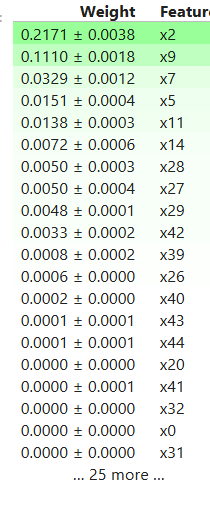

0: Age
1: Gender
2: Annual Income
3: Marital Status
4: Number of Dependents
5: Education Level
6: Occupation
7: Health Score
8: Location
9: Policy Type
10: Previous Claims
11: Vehicle Age
12: Credit Score
13: Insurance Duration
14: Policy Start Date
15: Customer Feedback
16: Smoking Status
17: Exercise Frequency
18: Property Type
19: Premium Amount
20: Policy_Start_Year
21: Policy_Start_Month
22: Policy_Start_Day
23: day_of_week
24: day_sin
25: day_cos
26: day_of_year
27: year_day_sin
28: year_day_cos
29: month
30: month_sin
31: month_cos
32: seconds_since_1970

## Ensemble method: Stacking

In [33]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor

In [34]:
base_estimators = [
    ('model1', cat_model),
    ('model2', light_model),
    ('model3', xgb_model),
    ('model4', hgbc_model)
]

stacking_model = StackingRegressor(estimators=base_estimators, final_estimator=Ridge())

stacking_model.fit(x_train, y_train)

ensemble_pred = stacking_model.predict(x_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [35]:
pred = ensemble_pred
y_val_true = np.expm1(y_val)
train_min = y_train.min()
clipped_predictions = np.maximum(pred, train_min)

print(rmsle(y_val_true, pred)) 

4.6921057410044


# Cross validation

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
def perform_cv_score(estimator, X, y, scoring):
    
    scores = cross_val_score(estimator, X=X, 
                             y=y,scoring=scoring, cv = 10, 
                             n_jobs=1,  error_score="raise")

    return scores

# Submission

In [37]:
predictions = {
    'xgb': xgb_model.predict(test_enc),
    'light': light_model.predict(test_enc),
    'cat': cat_model.predict(test_enc),
    'hgbc': hgbc_model.predict(test_enc),
    'ensemble': stacking_model.predict(test_enc)
}

In [38]:
for key, pred in predictions.items():
    submission = pd.DataFrame({'id': id_test, 'Premium Amount': np.expm1(pred)})
    submission.to_csv(f"submission_insurance_{key}.csv", index=False)